### Import Libraries

In [140]:
# CS21B2019
# Devarakonda SLR Siddesh
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Data

In [141]:
data = pd.read_csv('Linear Regression Dataset - data.csv')
data.head()

,x,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [142]:
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1].values.reshape(-1, 1)

### Train Test Split

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

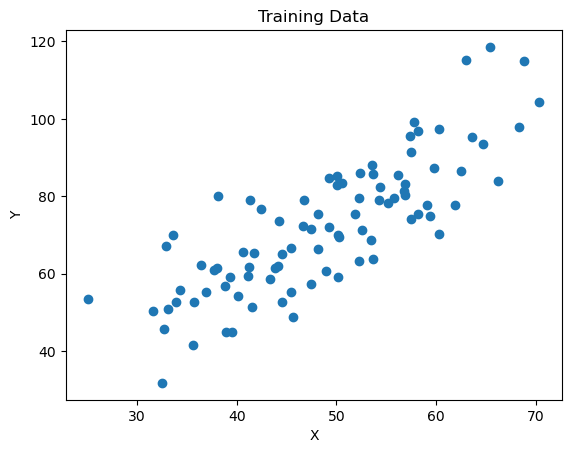

In [144]:
# plotting the train data
plt.scatter(X_train, y_train)
plt.title('Training Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Linear Regression using Gradient Descent

In [145]:
parameters = np.zeros((2, 1), dtype=np.float64)

In [146]:
def linear_regression(X, y, parameters, learning_rate = 0.001, epochs = 1000):
    m = len(X)
    costs = []
    for i in range(epochs):
        y_pred = X * parameters[0] + parameters[1]
        dm = (1/ m) * np.sum((y_pred - y) * X)
        dc = (1/ m) * np.sum(y_pred - y)
        parameters[0] = parameters[0] - learning_rate * dm
        parameters[1] = parameters[1] - learning_rate * dc
        cost = np.mean((y_pred - y) ** 2) / 2
        costs.append(cost)
        if(cost == 0):
            print("Converged at epoch ", i + 1);
            break;
    return parameters, costs

In [147]:
parameters, costs = linear_regression(X_train, y_train, parameters, 0.0001, 25)

### Plot Cost Vs Iterations

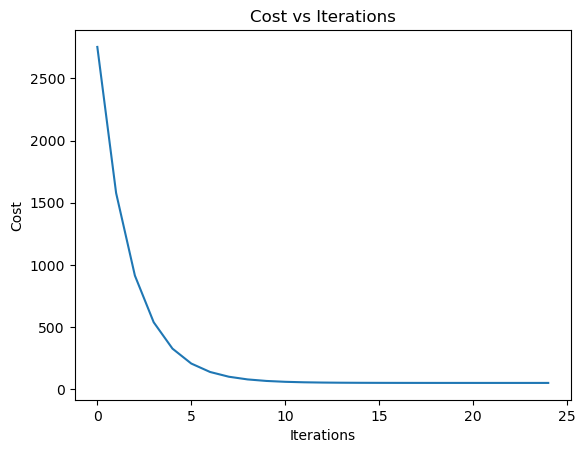

In [149]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

### Plotting the Regression Line

Text(0.5, 0, 'X')

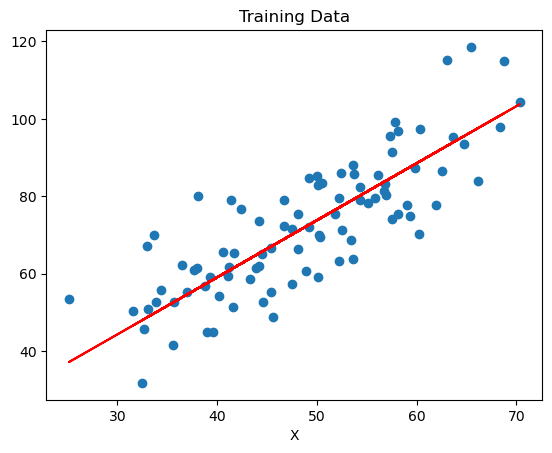

In [150]:
plt.scatter(X_train, y_train)
plt.plot(X_train, np.dot(X_train, parameters[0]) + parameters[1], color='red')
plt.title('Training Data')
plt.xlabel('X')

In [151]:
y_pred = np.dot(X_test, parameters[0]) + parameters[1]

In [154]:
compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
compare

,Actual,Predicted
0,95.455053,84.545698
1,69.588898,75.371050
2,62.562382,90.769537
3,71.139728,81.254260
4,86.642020,65.644001
5,90.123572,68.207226
6,82.892504,65.930598
7,57.812513,63.601462
8,73.434642,75.370924
9,81.536991,73.809992
